<a href="https://colab.research.google.com/github/kimdahyeon977/R-studio/blob/master/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_%EA%B3%BC%EC%A0%9C4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##example1 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
np.random.rand(5)
n=1000
p=5000
real_p=15
x=np.array(np.random.normal(size=n*p)).reshape(n,p)
y=pd.DataFrame(x[:,1:real_p]).apply(sum,axis=1)+np.random.normal(size=n)
y

0      8.561552
1     -1.985796
2     -1.599888
3     -0.015125
4      1.670878
         ...   
995   -0.984980
996   -0.702670
997    0.598359
998    1.500496
999   -4.888107
Length: 1000, dtype: float64

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

#lasso & Ridge & ElasticNet

In [4]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
models = []
models.append(('Lasso', Lasso()))
models.append(('Ridge', Ridge()))  
models.append(('ElasticNet', ElasticNet()))  
param_grid=[{
'alpha':[i/10 for i in range(1,11)]}]
for name, model in models:
  gs = GridSearchCV(
      estimator  =model,
      param_grid=param_grid,
      verbose=True
  )
  gs.fit(x_train,y_train)
  predict=gs.predict(x_test)
  mse=mean_squared_error(predict, y_test)
  msg = "%s - MSE : %f" % (name, mse)
  print(msg)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Lasso - MSE : 1.197109
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Ridge - MSE : 13.703918
Fitting 5 folds for each of 10 candidates, totalling 50 fits
ElasticNet - MSE : 1.579674


Lasso가 가장 좋은 성능을 보인다.

###exmaple 2

In [5]:
np.random.rand(10)
n=1000
p=5000
real_p=15
x=np.array(np.random.normal(size=n*p)).reshape(n,p)
y=pd.DataFrame(x[:,1:real_p]).apply(sum,axis=1)+np.random.normal(size=n)
y

0      5.903014
1     -1.716635
2     -2.425620
3     -0.687320
4      8.129069
         ...   
995   -5.224117
996    0.771931
997    2.212807
998   -1.531243
999   -6.471010
Length: 1000, dtype: float64

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=70)

In [7]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
models = []
models.append(('Lasso', Lasso()))
models.append(('Ridge', Ridge()))  
models.append(('ElasticNet', ElasticNet()))  
param_grid=[{
'alpha':[i/10 for i in range(1,11)]}]
for name, model in models:
  gs = GridSearchCV(
      estimator  =model,
      param_grid=param_grid,
      verbose=True
  )
  gs.fit(x_train,y_train)
  predict=gs.predict(x_test)
  mse=mean_squared_error(predict, y_test)
  msg = "%s - MSE : %f" % (name, mse)
  print(msg)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Lasso - MSE : 1.234375
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Ridge - MSE : 12.905781
Fitting 5 folds for each of 10 candidates, totalling 50 fits
ElasticNet - MSE : 1.692307


Lasso가 가장 좋은 성능을 보인다.

###example3

In [13]:
from scipy.stats import multivariate_normal
np.random.rand(15)
n=100
p=50
covmatrix=[]
for j in range(1,p+1):
  y=[i for i in range(1,p+1)]
  covmatrix.append(list(map(lambda b: 0.7**abs(j-b),y)))  

In [14]:
covmatrix=np.array(covmatrix).reshape(50,50)

In [28]:
mean=np.repeat(0,p)
x=np.random.multivariate_normal(mean, covmatrix, n)
x

array([[ 2.88729336,  0.80316313, -0.41524881, ...,  1.32213415,
         0.72903952,  2.6398942 ],
       [-0.843626  , -0.36221138,  0.47952234, ..., -0.2293461 ,
        -0.27318404, -0.56604367],
       [-0.54028423, -1.4848121 , -0.21003561, ..., -1.05410531,
        -1.29121928, -0.42977967],
       ...,
       [-0.99860325, -1.84274387, -1.31339246, ..., -1.67215685,
        -2.06903558, -2.00840499],
       [-0.44740414, -0.49514121,  0.24558827, ..., -1.54173387,
        -1.4315485 , -1.49528675],
       [ 0.37340583,  0.83567285,  0.79098032, ...,  0.92157223,
        -0.69660996, -1.01929631]])

In [32]:
np.random.normal(size=n)

array([ 0.94541378,  0.29511991,  0.18447202, -0.28999345,  1.09290881,
       -0.00362405,  0.16779117,  0.14363628,  0.47619124, -1.91902449,
        0.15874576,  0.72555884,  0.53547866, -0.6925089 ,  0.14945869,
       -0.15965248, -2.27840562,  0.513951  ,  0.2638001 ,  0.19900191,
       -0.96815495,  0.13703134, -0.49666487,  0.39421579,  0.53448431,
       -0.44153941,  0.98134388, -0.23444892, -1.20969103, -1.53585478,
       -0.35960891, -1.67303685,  1.50819792,  0.62691475, -0.04455736,
       -0.57997891, -0.46803739,  1.03837968,  0.29924852,  0.88370195,
        1.83208923, -0.15341256,  1.03279529,  1.47905189,  0.22574509,
       -0.71358965,  0.94840485, -2.2612572 ,  0.33288919,  0.78453125,
        1.60743487, -0.14787125, -1.07360383, -0.83075931, -0.47301178,
        0.87361021, -0.85776071,  2.38101925, -0.08521012,  0.12346401,
       -1.06458649,  0.35157297,  1.30735635, -0.34125857,  0.27119146,
        0.07556679, -0.46052889, -1.0010513 ,  0.01184201, -1.61

###여기서 부터 R과 결과가 다르게 나옵니다..... 수식은 똑같은데 파이썬과 계산하는 로직이 다른가 봅니다ㅠㅠ 모르겠습니다

In [29]:
y=10*(pd.DataFrame(x[:,0:2]).apply(sum,axis=1))+pd.DataFrame(x[:,4:15]).apply(sum,axis=1)+np.random.normal(size=n)

0     37.072145
1      6.533208
2    -24.682844
3    -19.039234
4      4.897653
        ...    
95   -69.425697
96     1.143509
97   -32.642925
98   -18.528500
99    16.719286
Length: 100, dtype: float64

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=80)

In [26]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
models = []
models.append(('Lasso', Lasso()))
models.append(('Ridge', Ridge()))  
models.append(('ElasticNet', ElasticNet()))  
param_grid=[{
'alpha':[i/10 for i in range(1,11)]}]
for name, model in models:
  gs = GridSearchCV(
      estimator  =model,
      param_grid=param_grid,
      verbose=True
  )
  gs.fit(x_train,y_train)
  predict=gs.predict(x_test)
  mse=mean_squared_error(predict, y_test)
  msg = "%s - MSE : %f" % (name, mse)
  print(msg)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Lasso - MSE : 1.615070
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Ridge - MSE : 3.794212
Fitting 5 folds for each of 10 candidates, totalling 50 fits
ElasticNet - MSE : 4.793855


Lasso가 가장 좋다.

#another example

In [33]:
from sklearn import datasets
data = datasets.load_boston()
y=data.target
np.random.rand(20)
x = pd.DataFrame(data=data['data'],columns=data['feature_names'])
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=99)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

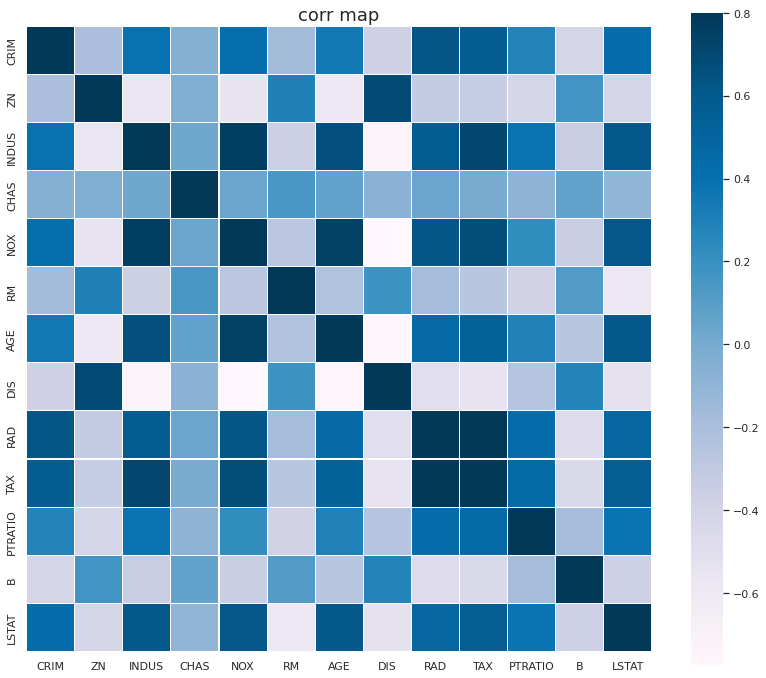

In [34]:
#Correlation HeatMap 
import matplotlib.pyplot as plt
import seaborn as sns

colormap = plt.cm.PuBu
sns.set(font_scale=1.0)

f , ax = plt.subplots(figsize = (14,12))
plt.title('corr map',y=1,size=18)
sns.heatmap(pd.DataFrame(x_train).corr(),square = True, linewidths = 0.1,
            cmap = colormap, linecolor = "white", vmax=0.8)

In [58]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)
print('기울기 a : ', model.coef_)
print('y절편 b : ', model.intercept_)
print('\n')

기울기 a :  [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
y절편 b :  36.459488385090125




###ridge regression

In [59]:
param_val = [1.0, 0.1, 0.03, 0.01, 0.003, 0.001, 0.0003, 0.0001, 0.00003, 0.00001]

In [60]:
np.random.rand(5)
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, explained_variance_score
for i in param_val:
    # Creat a model
    ridge_model = Ridge(alpha = i).fit(x_train, y_train)
    print('Score = ', ridge_model.score(x_train, y_train),' @ Hyperparameter = ', i)
    predictions = ridge_model.predict(x_test)
    print('Mean Absolute Error(MAE): ', mean_absolute_error(y_test, predictions))
    print('Mean Squared Error(MSE): ', mean_squared_error(y_test, predictions))
    print('Root Mean Squared Error(RMSE): ', np.sqrt(mean_squared_error(y_test, predictions)))
    print('Explained Variance Score(EVS): ', explained_variance_score(y_test, predictions))
    print('R2_Score: ', r2_score(y_test, predictions))
    print('---'*20)

    ##hyperparamter 0.00001일때 가장 좋은 성능

Score =  0.7545266527261585  @ Hyperparameter =  1.0
Mean Absolute Error(MAE):  3.596907242965403
Mean Squared Error(MSE):  29.51891319871306
Root Mean Squared Error(RMSE):  5.4331310676913604
Explained Variance Score(EVS):  0.6820077704836506
R2_Score:  0.6781725588317111
------------------------------------------------------------
Score =  0.7561366623785859  @ Hyperparameter =  0.1
Mean Absolute Error(MAE):  3.548641182426501
Mean Squared Error(MSE):  28.818620202248105
Root Mean Squared Error(RMSE):  5.368297700598217
Explained Variance Score(EVS):  0.6894995700709945
R2_Score:  0.6858074436800535
------------------------------------------------------------
Score =  0.7561799334289486  @ Hyperparameter =  0.03
Mean Absolute Error(MAE):  3.543852605653928
Mean Squared Error(MSE):  28.737143002853202
Root Mean Squared Error(RMSE):  5.360703592146576
Explained Variance Score(EVS):  0.6903708850427674
R2_Score:  0.6866957419184847
-------------------------------------------------------

##Lasso regression

In [61]:
np.random.rand(5)
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, explained_variance_score
for i in param_val:
    # Creat a model
    lasso_model = Lasso(alpha = i).fit(x_train, y_train)
    print('Score = ', lasso_model.score(x_train, y_train),' @ Hyperparameter = ', i)
    predictions = lasso_model.predict(x_test)
    print('Mean Absolute Error(MAE): ', mean_absolute_error(y_test, predictions))
    print('Mean Squared Error(MSE): ', mean_squared_error(y_test, predictions))
    print('Root Mean Squared Error(RMSE): ', np.sqrt(mean_squared_error(y_test, predictions)))
    print('Explained Variance Score(EVS): ', explained_variance_score(y_test, predictions))
    print('R2_Score: ', r2_score(y_test, predictions))
    print('---'*20)

    ##hyperparamter 0.00001일때 가장 좋은 성능

Score =  0.7040415689758606  @ Hyperparameter =  1.0
Mean Absolute Error(MAE):  3.8849845485862398
Mean Squared Error(MSE):  34.90249358834363
Root Mean Squared Error(RMSE):  5.907833239720264
Explained Variance Score(EVS):  0.6266988172987074
R2_Score:  0.619478531397323
------------------------------------------------------------
Score =  0.7457699396133288  @ Hyperparameter =  0.1
Mean Absolute Error(MAE):  3.692671661185504
Mean Squared Error(MSE):  31.357719304199325
Root Mean Squared Error(RMSE):  5.599796362743857
Explained Variance Score(EVS):  0.6633215558109575
R2_Score:  0.6581251316195511
------------------------------------------------------------
Score =  0.752350083849513  @ Hyperparameter =  0.03
Mean Absolute Error(MAE):  3.6301432809934906
Mean Squared Error(MSE):  30.08496337694451
Root Mean Squared Error(RMSE):  5.4849761509914075
Explained Variance Score(EVS):  0.6761977585195618
R2_Score:  0.6720012448945495
--------------------------------------------------------

##Elastic Net

In [62]:
np.random.rand(5)
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, explained_variance_score
for i in param_val:
    # Creat a model
    elastic_model = ElasticNet(alpha = i).fit(x_train, y_train)
    print('Score = ', elastic_model.score(x_train, y_train),' @ Hyperparameter = ', i)
    predictions = elastic_model.predict(x_test)
    print('Mean Absolute Error(MAE): ', mean_absolute_error(y_test, predictions))
    print('Mean Squared Error(MSE): ', mean_squared_error(y_test, predictions))
    print('Root Mean Squared Error(RMSE): ', np.sqrt(mean_squared_error(y_test, predictions)))
    print('Explained Variance Score(EVS): ', explained_variance_score(y_test, predictions))
    print('R2_Score: ', r2_score(y_test, predictions))
    print('---'*20)

    ##hyperparamter 0.00001일때 가장 좋은 성능

Score =  0.7088829696275678  @ Hyperparameter =  1.0
Mean Absolute Error(MAE):  3.8645976442232723
Mean Squared Error(MSE):  34.52652328232417
Root Mean Squared Error(RMSE):  5.875927440185436
Explained Variance Score(EVS):  0.6303656737369002
R2_Score:  0.6235775156901043
------------------------------------------------------------
Score =  0.7452057406835761  @ Hyperparameter =  0.1
Mean Absolute Error(MAE):  3.716105829084591
Mean Squared Error(MSE):  31.55972184984037
Root Mean Squared Error(RMSE):  5.617804006000954
Explained Variance Score(EVS):  0.6608194089051698
R2_Score:  0.6559228160418904
------------------------------------------------------------
Score =  0.7495584148321892  @ Hyperparameter =  0.03
Mean Absolute Error(MAE):  3.670412637534856
Mean Squared Error(MSE):  30.70534993157904
Root Mean Squared Error(RMSE):  5.541240829595754
Explained Variance Score(EVS):  0.6695390662184448
R2_Score:  0.6652375332338524
---------------------------------------------------------

###결론 : 아주 근소한 소수점 5번째수 자리 차이로 Ridge가 가장 성능이 좋다.